<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

# Descarga y manipulación de precios históricos 

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas (extensión `.csv`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
___

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.cvs`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 al 31-12-2017 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [1]:
import numpy as np
import datetime
import scipy.stats as stats

# Importamos pandas
import pandas as pd

#algunas opciones para Pandas
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 6)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.width', 78)
# pd.set_option('precision', 3)
pd.set_option('display.max_rows', 10)

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [2]:
# Función read_csv
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [3]:
# Cargamos hoja de calculo en un dataframe
file_name = 'Precios/AAPL.csv'
aapl = pd.read_csv(file_name)
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700
1,2019-04-30,203.059998,203.399994,199.110001,200.669998,198.077362,46534900
2,2019-05-01,209.880005,215.309998,209.229996,210.520004,207.800110,64827300
3,2019-05-02,209.839996,212.649994,208.130005,209.149994,206.447800,31996300
4,2019-05-03,210.889999,211.839996,210.229996,211.750000,209.014221,20892400
...,...,...,...,...,...,...,...
248,2020-04-22,273.609985,277.899994,272.200012,276.100006,276.100006,29264300
249,2020-04-23,275.869995,281.750000,274.869995,275.029999,275.029999,31203600
250,2020-04-24,277.200012,283.010010,277.000000,282.970001,282.970001,31627200
251,2020-04-27,281.799988,284.540009,279.950012,283.170013,283.170013,29236400


#### Anotación #1
- Quisieramos indizar por fecha.

In [4]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col=['Date'])
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-29,204.399994,205.970001,203.860001,204.610001,201.966461,22204700
2019-04-30,203.059998,203.399994,199.110001,200.669998,198.077362,46534900
2019-05-01,209.880005,215.309998,209.229996,210.520004,207.800110,64827300
2019-05-02,209.839996,212.649994,208.130005,209.149994,206.447800,31996300
2019-05-03,210.889999,211.839996,210.229996,211.750000,209.014221,20892400
...,...,...,...,...,...,...
2020-04-22,273.609985,277.899994,272.200012,276.100006,276.100006,29264300
2020-04-23,275.869995,281.750000,274.869995,275.029999,275.029999,31203600
2020-04-24,277.200012,283.010010,277.000000,282.970001,282.970001,31627200


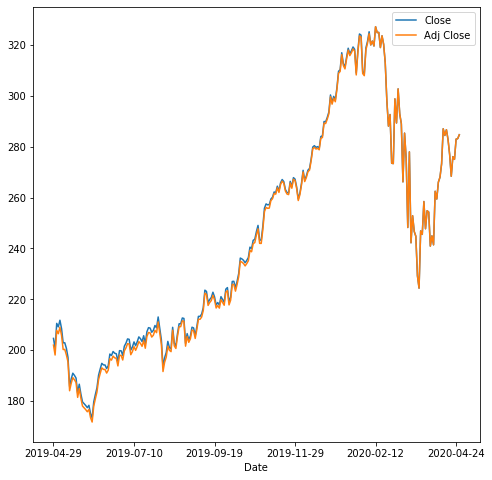

In [131]:
# Graficar precios de cierre y precios de cierre ajustados
import matplotlib.pyplot as plt
%matplotlib inline
aapl[['Close', 'Adj Close']].plot(figsize=(8,8))
plt.show()

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [113]:
# Cargamos hoja de calculo en un dataframe
aapl = pd.read_csv(file_name, index_col=['Date'], usecols=['Date', 'Adj Close'])
aapl.columns = ['AAPL']
aapl

,AAPL
Date,
2019-04-29,201.966461
2019-04-30,198.077362
2019-05-01,207.800110
2019-05-02,206.447800
2019-05-03,209.014221
...,...
2020-04-22,276.100006
2020-04-23,275.029999
2020-04-24,282.970001


**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

> Leer archivos usando el paquete `os`: [link](https://realpython.com/working-with-files-in-python/)

In [5]:
import os

# List all files in a directory using os.listdir ---> os.path.isfile check if is a file
basepath = 'Precios/'

files = [os.path.join(basepath, os.listdir(basepath)[i]) for i in range(len(os.listdir(basepath)))]
files

['Precios/AAPL.csv', 'Precios/AMZN.csv', 'Precios/KO.csv', 'Precios/NKE.csv']

['AAPL', 'AMZN', 'KO', 'NKE']

In [16]:
# Read the data of Adj Close for each file
data = pd.concat([pd.read_csv(files[i], usecols= ['Date', 'Adj Close'], index_col= ['Date']) 
                  for i in range(len(files))], axis = 1 )
data.columns = os.listdir(basepath)
#[os.listdir(basepath)[i].replace('.csv','') for i in range(len(os.listdir(basepath)))]
data

,AAPL.csv,AMZN.csv,KO.csv,NKE.csv
Date,,,,
2019-04-29,201.966461,1938.430054,46.930996,87.317513
2019-04-30,198.077362,1926.520020,47.551323,86.892097
2019-05-01,207.800110,1911.520020,47.095772,84.982697
2019-05-02,206.447800,1900.819946,46.901920,84.359428
2019-05-03,209.014221,1962.459961,47.221779,84.784836
...,...,...,...,...
2020-04-22,276.100006,2363.489990,45.680000,88.769997
2020-04-23,275.029999,2399.449951,45.070000,87.349998
2020-04-24,282.970001,2410.219971,45.430000,88.370003


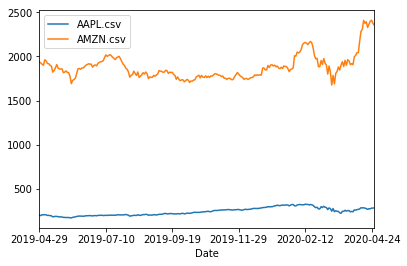

In [19]:
import matplotlib.pyplot as plt
data[['AAPL.csv', 'AMZN.csv']].plot()
plt.show()

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: **conda install pandas-datareader**;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [20]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader.data as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [21]:
# Función DataReader
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, access_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (google, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("google", "fred", "ff")
    start : {datetime, None}
        left boundary for range (defaults to 1/1/2010)
    end : {datetime, None}
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given for symbol, represents the pause be

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: se tiene acceso a su api a través de Stooq Index Data.
 - Quandl: solo permite descargar datos de equities estadounidenses de manera gratuita. Es la base de datos más completa. Si se desea usar hay que crear una cuenta para autenticarse en la API.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.
 
 > Enlace de las API disponibles de DataReader [link](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

In [35]:
# Ejemplo google finance 
ticker = 'AAPL'
source = 'stooq'
start_ = '2020-01-05'
end = 'today'
aapl_goo = web.DataReader(ticker, source)
aapl_goo

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-09,120.5000,121.9900,116.0500,116.3200,154515315.0
2020-11-06,118.3200,119.2000,116.1300,118.6900,114457922.0
2020-11-05,117.7500,119.4100,116.6700,118.8200,126605120.0
2020-11-04,113.9400,115.3900,112.1600,114.7500,138473969.0
2020-11-03,109.4700,111.3000,108.5400,110.2500,107810125.0
...,...,...,...,...,...
2010-01-08,6.4828,6.5317,6.4409,6.5315,518461827.0
2010-01-07,6.5217,6.5317,6.4404,6.4878,552259740.0
2010-01-06,6.6048,6.6311,6.4926,6.4993,637644647.0


## - Precios desde `quandl`

>Página oficial de `quandl` para crear cuenta y tutorial de instalación de su api
> Recuerden que cuando se usa anaconda no se debe de usar el comando `pip` o `pip3` sino `conda`, por ejemplo en este caso sería `conda install quandl`

> https://docs.quandl.com/docs/python-installation

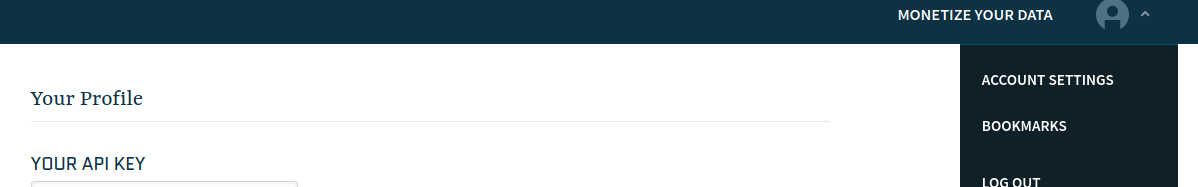

Tu api_key lo encuentras en los detalles de tu cuenta después de haber creado un usuario

In [38]:
# Ejemplo quandl
import quandl
######################### USar la api key que les arroja la página de quandl
quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

ticker = ['AAPL', 'MSFT','KO']
date = { 'gte': '2016-01-01', 'lte': '2020-04-27' }
column = { 'columns': ['ticker', 'date', 'Adj_close']}

data = quandl.get_table('WIKI/PRICES', qopts = column, ticker = ticker, date = date)# ticker = 'WIKI/AAPL' #'AAPL.US'
data = data.set_index('date') # Poner los índices como las fechas
data
# Seleccionar los ADJ_CLOSE de ticker
data_n = pd.concat([data.loc[data['ticker']== i,'adj_close'] for i in ticker], axis = 1)
data_n.columns = ticker
data_n

#### data.loc[data['ticker']=='AAPL','adj_close']

ModuleNotFoundError: No module named 'quandl'

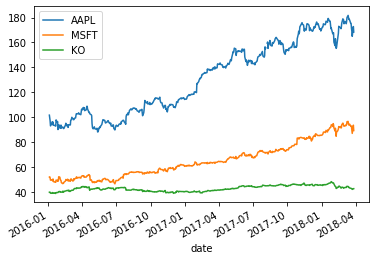

In [57]:
# Gráfica de precios
data_n.plot()

### Uso de Pandas para bajar datos de Yahoo! Finance
* Intentamos con la función YahooDailyReader y con la función DataReader

In [39]:
# help(web.YahooDailyReader)

In [41]:
# YahooDailyReader
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = 'today'
aapl_yah = web.YahooDailyReader(ticker, start, end, interval='d').read()
aapl_yah

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.600000,19.200001,20.600000,19.389999,452156,19.389999
2015-01-05,20.590000,19.170000,19.700001,20.030001,467183,20.030001
2015-01-06,20.200001,19.270000,20.200001,19.570000,301361,19.570000
2015-01-07,19.950001,19.370001,19.670000,19.430000,222100,19.430000
2015-01-08,21.400000,19.430000,19.430000,20.840000,289943,20.840000
...,...,...,...,...,...,...
2020-11-04,4.440000,4.250000,4.440000,4.270000,158725,4.270000
2020-11-05,4.360000,4.210000,4.280000,4.240000,170691,4.240000
2020-11-06,4.320000,4.210000,4.240000,4.210000,185762,4.210000


In [42]:
# Observar que se puede usar usando las dos librerías
closes = web.DataReader(name=ticker, data_source='yahoo', start=start, end=end)
closes

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,20.600000,19.200001,20.600000,19.389999,452156,19.389999
2015-01-05,20.590000,19.170000,19.700001,20.030001,467183,20.030001
2015-01-06,20.200001,19.270000,20.200001,19.570000,301361,19.570000
2015-01-07,19.950001,19.370001,19.670000,19.430000,222100,19.430000
2015-01-08,21.400000,19.430000,19.430000,20.840000,289943,20.840000
...,...,...,...,...,...,...
2020-11-04,4.440000,4.250000,4.440000,4.270000,158725,4.270000
2020-11-05,4.360000,4.210000,4.280000,4.240000,170691,4.240000
2020-11-06,4.320000,4.210000,4.240000,4.210000,185762,4.210000


Para efectos del curso y debido a que en yahoo finance podemos tener acceso a activos de la bolsa méxicana vamos a utilizar de acá en adelante el paquete de DataReader y la siguiente función para descargar precios de distintos activos:

In [43]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [44]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2018-01-01'
end = 'today'
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2018-01-02,41.105534,82.599319,197.754150,2695.810059
2018-01-03,41.098373,82.983727,210.769104,2713.060059
2018-01-04,41.289268,83.714119,211.880112,2723.989990
2018-01-05,41.759361,84.752014,213.675629,2743.149902
2018-01-08,41.604263,84.838486,220.222809,2747.709961
...,...,...,...,...
2020-11-04,114.752022,216.389999,551.770020,3443.439941
2020-11-05,118.824997,223.289993,566.400024,3510.449951
2020-11-06,118.690002,223.720001,582.479980,3509.439941


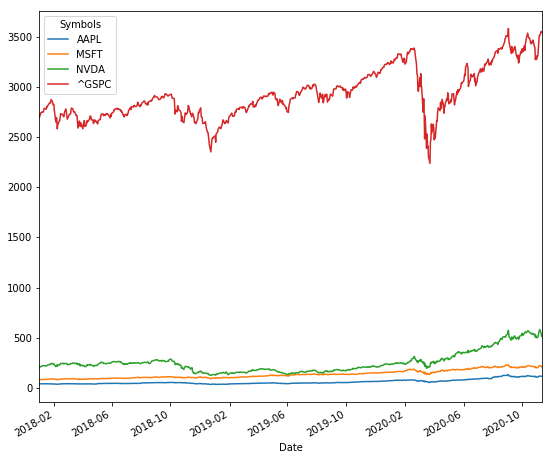

In [45]:
# Gráfica de datos
closes.plot(figsize=(9,8))

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

Como se puede notar, en este caso se consideran tres activos 
- Nvidia:NVDA
- Apple: AAPL
- Microsoft: MSFT

y, el índice 

- Standard & Poor's: 500S&P500.

Todos almacenados en la variable *closes*.

El objeto *assets* tiene la característica *items*. Con estos, se pueden verificar los registros almacenados

In [46]:
closes.columns

Index(['AAPL', 'MSFT', 'NVDA', '^GSPC'], dtype='object', name='Symbols')

Acceder a alguna posición específica de la variable *closes*

In [47]:
closes.iloc[0,0]

41.105533599853516

Si deseamos encontrar los precios de cierre en una fecha específica usamos 

In [49]:
closes.loc['2018-07-02','AAPL']

45.02085494995117

O, finalmente, los valores del S&P500

In [53]:
closes['^GSPC']

Date
2018-01-02    2695.810059
2018-01-03    2713.060059
2018-01-04    2723.989990
2018-01-05    2743.149902
2018-01-08    2747.709961
                 ...     
2020-11-04    3443.439941
2020-11-05    3510.449951
2020-11-06    3509.439941
2020-11-09    3550.500000
2020-11-10    3542.300049
Name: ^GSPC, Length: 721, dtype: float64

### Actividad
Obtener datos históricos de
- GRUPO CARSO, S.A.B. DE C.V.
- GRUPO FINANCIERO INBURSA, S.A.B. DE C.V.
- GRUPO FINANCIERO BANORTE, S.A.B DE C.V.
- GRUPO AEROMÉXICO, S.A.B. DE C.V.

en el año 2014.

1. ¿Qué compañía reportó precios de cierre más altos en *2014-07-14*?
2. Obtener los precios de cierre de cada compañía en todo el año.
3. Comparar, para cada compañía, los precios de cierre entre *2014-01-02* y *2014-12-31*.

> Revisar los nombres de estas acciones en yahoo: https://finance.yahoo.com/

In [55]:
ticker_mx = ['GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'AEROMEX.MX']

start = '2014-01-02'
end = '2014-12-31'
assets_mx = get_adj_closes(tickers=ticker_mx, start_date=start, end_date=end)
assets_mx

Symbols,AEROMEX.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX
Date,,,,
2014-01-02,18.049999,63.696423,32.456123,78.120354
2014-01-03,18.090000,64.046753,32.040485,78.864120
2014-01-06,18.469999,62.036949,31.173059,77.462074
2014-01-07,19.459999,61.557541,32.212166,77.744202
2014-01-08,18.990000,61.096577,31.344736,77.017525
...,...,...,...,...
2014-12-24,19.639999,68.471588,33.982063,69.379349
2014-12-26,19.629999,69.468933,34.320061,69.344826
2014-12-29,19.520000,69.823143,34.986908,70.026627


In [56]:
# Encontrar los precios en la fecha 2014-07-14
assets_mx_20140714 = assets_mx.loc['2014-07-14']
assets_mx_20140714

Symbols
AEROMEX.MX     22.070000
GCARSOA1.MX    67.414848
GFINBURO.MX    35.452789
GFNORTEO.MX    78.351700
Name: 2014-07-14 00:00:00, dtype: float64

In [57]:
# Encontrar la acción que reportó mayor valor en la fecha 2014-07-14
assets_mx_20140714.idxmax(), assets_mx_20140714.max()

('GFNORTEO.MX', 78.35169982910156)

In [58]:
# Otra forma de hacerlo usando la función pop
assets_mx_20140714.pop(assets_mx_20140714.idxmax())

78.35169982910156

In [59]:
assets_mx_20140714

Symbols
AEROMEX.MX     22.070000
GCARSOA1.MX    67.414848
GFINBURO.MX    35.452789
Name: 2014-07-14 00:00:00, dtype: float64

In [60]:
# Acceder a algunas filas particulares de los precios
assets_mx.iloc[[0, -1]]

Symbols,AEROMEX.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX
Date,,,,
2014-01-02,18.049999,63.696423,32.456123,78.120354
2014-12-31,20.440001,67.660667,34.785938,70.078407


In [61]:
#encontrar la diferencias entre dos filas en particular
assets_mx.iloc[[0, -1]].diff().iloc[1:]
# 20.44-18.05

Symbols,AEROMEX.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX
Date,,,,
2014-12-31,2.390001,3.964245,2.329815,-8.041946


In [64]:
assets_mx

Symbols,AEROMEX.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX
Date,,,,
2014-01-02,18.049999,63.696423,32.456123,78.120354
2014-01-03,18.090000,64.046753,32.040485,78.864120
2014-01-06,18.469999,62.036949,31.173059,77.462074
2014-01-07,19.459999,61.557541,32.212166,77.744202
2014-01-08,18.990000,61.096577,31.344736,77.017525
...,...,...,...,...
2014-12-24,19.639999,68.471588,33.982063,69.379349
2014-12-26,19.629999,69.468933,34.320061,69.344826
2014-12-29,19.520000,69.823143,34.986908,70.026627


# 2. Graficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios `AEROMEX.MX`, así como el volumen de transacciones.

In [90]:
ticker = 'AEROMEX.MX'
start = '2015-01-01'
end = '2020-04-27'
aero_mx = web.DataReader(ticker, data_source='yahoo', start=start, end=end)
# Se extraen los precios de cierre y los volúmenes de transacción
clos_aero_mx = aero_mx['Adj Close']
# clos_aero_mx
vol_aero_mx = aero_mx['Volume']
vol_aero_mx
# vol_aero_mx.shape,clos_aero_mx.shape

Date
2015-01-02    452156
2015-01-05    467183
2015-01-06    301361
2015-01-07    222100
2015-01-08    289943
               ...  
2020-04-21    197330
2020-04-22     87211
2020-04-23    149015
2020-04-24    255950
2020-04-27    159641
Name: Volume, Length: 1335, dtype: int64

El gráfico de esta serie se obtiene de forma simple mediante el siguiente comando

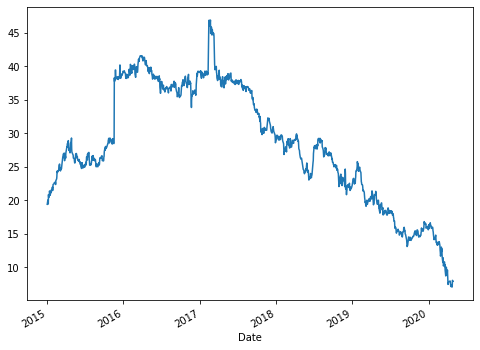

In [145]:
clos_aero_mx.plot(figsize=(8,6))

De forma similar, se grafica la serie de volúmenes de transacción

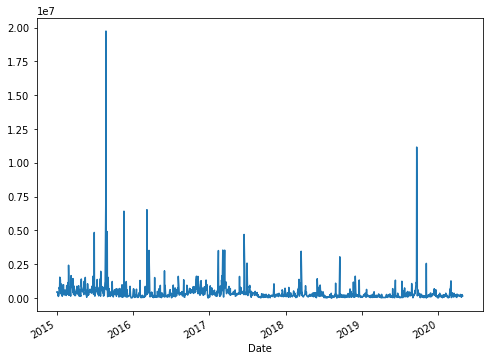

In [146]:
vol_aero_mx.plot(figsize=(8,6));

Usualmente, es conveniente graficar al precio de cierre de una acción en conjunto con su volumen de transacciones. El siguiente es un ejemplo de esta clase de graficas para el caso de Aeroméxico.

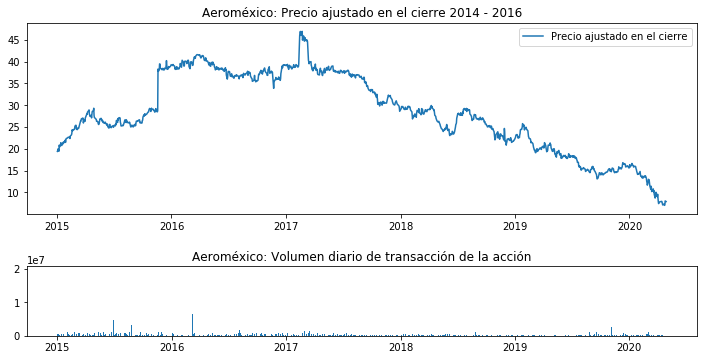

In [91]:
############## Forma de graficar 1
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc='best')
bottom = plt.subplot2grid((4,4), (2, 0), rowspan=1, colspan=4)
bottom.bar(vol_aero_mx.index, vol_aero_mx)
plt.title('Aeroméxico: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)


############## Otra forma de graficar
# plt.figure(figsize=(10,10))
# plt.subplot(2,1,1)
# plt.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado en el cierre')
# plt.title('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
# plt.legend(loc='best')
# plt.xlim([clos_aero_mx.index[0],clos_aero_mx.index[-1]])
# plt.show()

# plt.figure(figsize=(10,5))
# plt.subplot(2,1,2)
# plt.bar(vol_aero_mx.index, vol_aero_mx)
# plt.title('Aeroméxico: Volumen diario de transacción de la acción')
# plt.xlabel('Date')
# plt.xlim([vol_aero_mx.index[0],vol_aero_mx.index[-1]])
# plt.ylim([0,.8e7])
# plt.show()

Otro procedimiento que se efectúa con frecuencia, es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [92]:
short_rollmean_AM_AC = clos_aero_mx.rolling(window=20).mean()
long_rollmean_AM_AC = clos_aero_mx.rolling(window=100).mean()
short_rollmean_AM_AC

Date
2015-01-02       NaN
2015-01-05       NaN
2015-01-06       NaN
2015-01-07       NaN
2015-01-08       NaN
               ...  
2020-04-21    8.2480
2020-04-22    8.1645
2020-04-23    8.0675
2020-04-24    7.9700
2020-04-27    7.8645
Name: Adj Close, Length: 1335, dtype: float64

Grafiquemos los precios junto con las medias móviles que acabamos de calcular

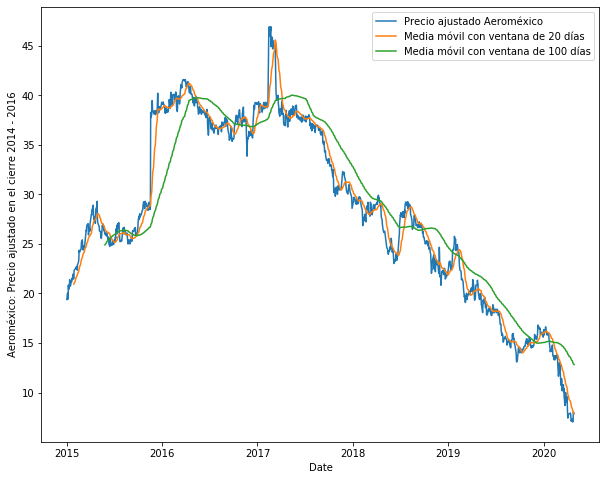

In [93]:
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label='Precio ajustado Aeroméxico')
ax.plot(short_rollmean_AM_AC.index, short_rollmean_AM_AC, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_AM_AC.index, long_rollmean_AM_AC, label='Media móvil con ventana de 100 días')
ax.set_xlabel('Date')
ax.set_ylabel('Aeroméxico: Precio ajustado en el cierre 2014 - 2016')
ax.legend(loc='best');

Las desviaciones estándar móviles se calculan con

In [94]:
short_rollstd_AM_AC = clos_aero_mx.rolling(window=20).std()
long_rollstd_AM_AC = clos_aero_mx.rolling(window=100).std()

y los gráficos...

In [ ]:
clos_aero_mx

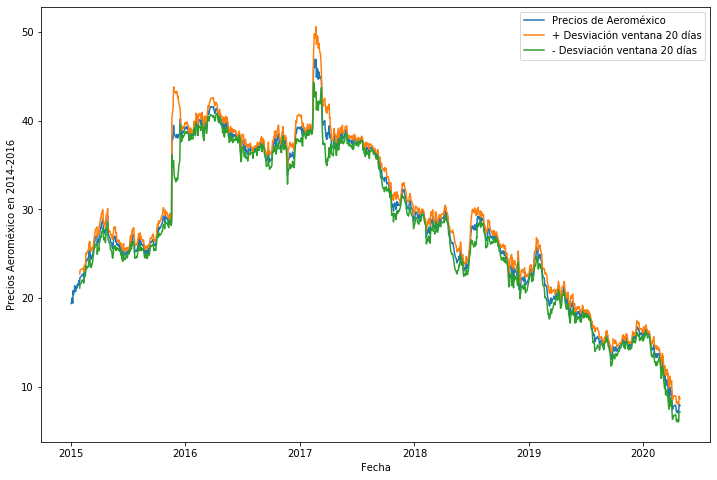

In [95]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+short_rollstd_AM_AC, label = '+ Desviación ventana 20 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-short_rollstd_AM_AC, label = '- Desviación ventana 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

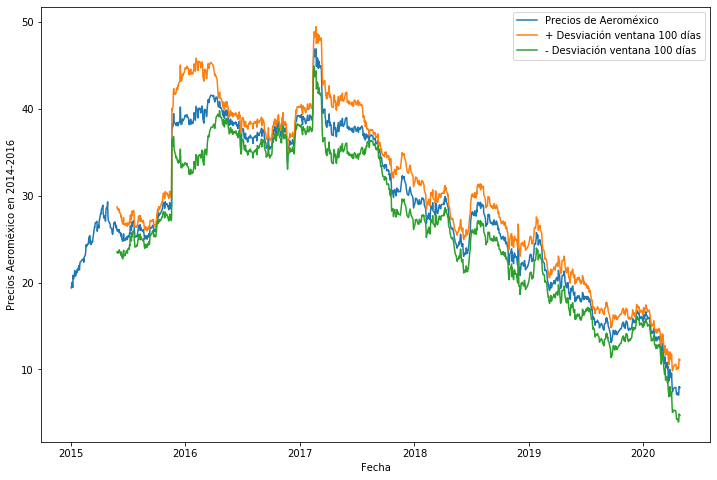

In [96]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(clos_aero_mx.index, clos_aero_mx, label = 'Precios de Aeroméxico')
ax.plot(clos_aero_mx.index, clos_aero_mx+long_rollstd_AM_AC, label = '+ Desviación ventana 100 días')
ax.plot(clos_aero_mx.index, clos_aero_mx-long_rollstd_AM_AC, label = '- Desviación ventana 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precios Aeroméxico en 2014-2016')
ax.legend(loc='best')

Podemos graficar los precios de las acciones americanas

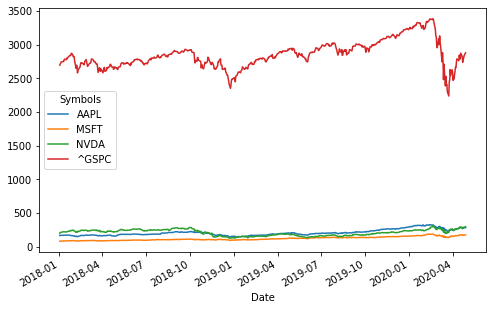

In [97]:
closes.plot(figsize=(8,5))

Sin embargo, vemos que los precios de cierre del índice S&P500 están muy por encima de los precios de cierre de los activos, lo cual dificulta la visualización. Entonces, obtenemos el gráfico de solo los activos

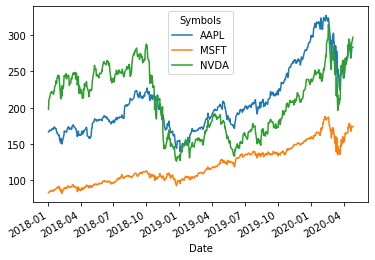

In [98]:
closes[['AAPL','MSFT','NVDA']].plot()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>